<a href="https://colab.research.google.com/github/ArtemBaron/baron_vergeles/blob/main/ml_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1PvuIrDm3CqfyR-hkJ5yCjs_cPIB_Ewlm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PvuIrDm3CqfyR-hkJ5yCjs_cPIB_Ewlm
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 130MB/s]




https://drive.google.com/file/d/1PvuIrDm3CqfyR-hkJ5yCjs_cPIB_Ewlm/view?usp=sharing


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])


In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])


In [ ]:
train['Exited'].mean()


0.20366666666666666

In [ ]:
val['Exited'].mean()


0.204

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [ ]:
! pip install phik


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
import phik


In [ ]:
import seaborn as sns
cm = sns.dark_palette("green", as_cmap=True)

In [ ]:
phik_overview = train_full.phik_matrix() 

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [ ]:
phik_overview.style.background_gradient(cmap=cm)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.000000,0.000000,0.034377,0.000000,0.000000,0.034611,0.000000,0.000000,0.014928,0.000000,0.000000,0.000000,0.000000
CustomerId,0.000000,1.000000,0.000000,0.013376,0.000000,0.000000,0.040756,0.000000,0.045946,0.021812,0.000000,0.000000,0.000000,0.035477
Surname,0.000000,0.000000,1.000000,0.251645,0.000000,0.088309,0.000000,0.167206,0.455619,0.332498,0.000000,0.104124,0.116392,0.000000
CreditScore,0.034377,0.013376,0.251645,1.000000,0.020915,0.017583,0.017988,0.000000,0.000000,0.051748,0.032131,0.024001,0.037396,0.105371
Geography,0.000000,0.000000,0.000000,0.020915,1.000000,0.015531,0.075412,0.000000,0.464219,0.043380,0.000000,0.007135,0.031067,0.104047
Gender,0.000000,0.000000,0.088309,0.017583,0.015531,1.000000,0.058276,0.036880,0.000000,0.074385,0.000000,0.025852,0.030298,0.165231
Age,0.034611,0.040756,0.000000,0.017988,0.075412,0.058276,1.000000,0.032396,0.031008,0.151161,0.012821,0.183617,0.053761,0.498768
Tenure,0.000000,0.000000,0.167206,0.000000,0.000000,0.036880,0.032396,1.000000,0.000000,0.054148,0.045662,0.003301,0.000000,0.030333
Balance,0.000000,0.045946,0.455619,0.000000,0.464219,0.000000,0.031008,0.000000,1.000000,0.374960,0.016426,0.000000,0.023632,0.167823
NumOfProducts,0.014928,0.021812,0.332498,0.051748,0.043380,0.074385,0.151161,0.054148,0.374960,1.000000,0.000000,0.061051,0.031258,0.564969


In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
cm = sns.dark_palette("seagreen", as_cmap=True)

In [ ]:
df.corr().style.background_gradient(cmap=cm)

<ipython-input-22-eb0e1fb7befa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
df.corr()['Exited'].sort_values(ascending=False)
  

<ipython-input-23-e4be023f419e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited'].sort_values(ascending=False)


Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [ ]:
phik_overview['Exited'].sort_values(ascending=False)


Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

In [ ]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [ ]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [ ]:
model = model.rename({'Exited': 'score_prod'}, axis = 1)

In [ ]:
train_full = train_full.merge(model, how = 'left', on = 'NumOfProducts')

In [ ]:
train_full['score_mean'] = train_full['Exited'].mean()

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(train_full['Exited'], train_full['score_mean'])

0.5055572860042145

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359616823203511

uplift

In [ ]:
train_full['Exited'].sample(frac = 0.2, random_state = 42).mean()

0.210625

In [ ]:
exited_all = train_full['Exited'].sum()

In [ ]:
train_full['Exited'].sample(frac = 0.2, random_state = 42).sum()/exited_all 

0.2067484662576687

In [ ]:
train_full = train_full.sort_values('score_prod', ascending = False)

In [ ]:
train_full.head(round(len(train_full)*0.2))['Exited'].sum()/exited_all

0.3576687116564417

In [ ]:
0.3737727910238429/0.21071428571428572

1.773836974350441

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np
np.random.seed(42)
np.random.uniform(0, 0.001, size = len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [ ]:
np.random.seed(42)

train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0, 0.001, size = len(train_full))

In [ ]:
train_full['score_prod'].nunique()

8000

In [ ]:
def uplift(df, score, pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score, ascending = False)
  exited_found = df.head(round(len(df) * pct))['Exited'].sum()
  return (exited_found / exited_all) / pct

In [ ]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [ ]:
test = test.merge(model, how = 'left', on = 'NumOfProducts')
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0, 0.001, size = len(test))
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992


In [ ]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359717821616623

In [ ]:
log_loss(test['Exited'], test['score_prod'])

0.4338658337619006

In [ ]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

<Axes: >

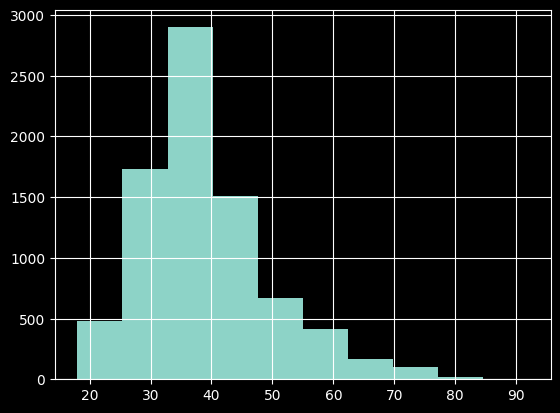

In [ ]:
import matplotlib as plt
plt.style.use("dark_background")
train_full['Age'].hist()

In [ ]:
train_full['age_group'] = pd.qcut(train_full['Age'], 5)

In [ ]:
train_full.groupby('age_group')['Exited'].agg(['count', 'mean'])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


In [ ]:
pd.qcut(train_full['Age'], 5, retbins = True, labels=False)

(6946    4
 1245    2
 7056    4
 7847    4
 693     3
        ..
 1742    1
 4912    4
 4913    2
 4914    3
 0       2
 Name: Age, Length: 8000, dtype: int64,
 array([18., 31., 35., 40., 46., 92.]))

In [ ]:
train_full['age_group'] = pd.cut(train_full['Age'], [0, 31, 35, 40, 46, float('inf')]) 

In [ ]:
model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()

In [ ]:
model = model.rename({'Exited': 'score_prod_age'}, axis = 1)

In [ ]:
train_full = train_full.merge(model, how = 'left', on = ['NumOfProducts', 'age_group'])

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age'])

0.3866695862492173

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age'])

0.3866695862492173

In [ ]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

In [ ]:
test['age_group'] = pd.cut(test['Age'], [0, 31, 35, 40, 46, float('inf')]) 

In [ ]:
test = test.merge(model, how = 'left', on = ['NumOfProducts', 'age_group'])

In [ ]:
log_loss(test['Exited'], test['score_prod_age'])

0.3870707514157596

In [ ]:
log_loss(test['Exited'], test['score_prod_age'])

0.3866695862492173

In [ ]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

In [ ]:
pip install chatGPT_debugger


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
from chatGPT_debugger.chatGPT_debugger import debug

@debug

SyntaxError: ignored

In [ ]:
 train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [ ]:
 train_full.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [ ]:
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

In [ ]:
model = model.rename({'Exited': 'score_prod_age_active'}, axis = 1)

In [ ]:
train_full = train_full.merge(model, how = 'left', on = ['NumOfProducts', 'age_group', 'IsActiveMember'])

In [ ]:
test = test.merge(model, how = 'left', on = ['NumOfProducts', 'age_group', 'IsActiveMember'])

In [ ]:
def print_metrics(df, score):
  print(log_loss(df['Exited'], df[score]))
  print(uplift(df, score, 0.2))


In [ ]:
print_metrics(train_full,'score_prod_age_active' )
print_metrics(test,'score_prod_age_active' )

0.36550197514510024
2.8496932515337425
0.3638472889481342
2.862407862407862


In [ ]:
! pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod_x',
       'score_mean', 'age_group', 'score_prod_y', 'score_prod_age',
       'score_prod_age_active'],
      dtype='object')

In [ ]:
X = [ 'NumOfProducts',
       'IsActiveMember', 'Age']

In [ ]:
y = ['Exited']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)


In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))


0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 50.4ms	remaining: 50.3s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 328ms	remaining: 2.92s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 626ms	remaining: 2.49s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.12s	remaining: 2.6s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.4s	remaining: 2.09s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.68s	remaining: 1.68s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.98s	remaining: 1.31s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 2.17s	remaining: 925ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.35s	remaining: 583ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.53s	remaining: 278ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 2.73s	remaining: 0us

bestTest = 0.341

In [ ]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]


In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [ ]:
print_metrics(test,'score_prod_age_active')


0.3638472889481342
2.862407862407862


In [ ]:
print_metrics(test,'score_cat_prod_age_active')


0.35878132799643003
2.899262899262899


In [ ]:
train.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
train


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
4644,4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0
8942,8943,15709780,Azuka,667,France,Female,37,9,71786.90,2,1,1,67734.79,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,0


In [ ]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']

In [ ]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
train.select_dtypes(include='object')


,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [ ]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)


In [ ]:
model.fit(train_data,eval_set=valid_data)


0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 29.1ms	remaining: 29.1s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 2.29s	remaining: 20.3s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 3.26s	remaining: 12.9s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 4.03s	remaining: 9.35s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 4.78s	remaining: 7.14s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 5.56s	remaining: 5.54s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 6.32s	remaining: 4.2s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 7.08s	remaining: 3.02s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 7.84s	remaining: 1.95s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 8.61s	remaining: 946ms
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 9.38s	remaining: 0us

bestTest = 0.31

In [ ]:

test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [ ]:
print_metrics(test,'score_cat_prod_age_active')


0.35878132799643003
2.899262899262899


In [ ]:
print_metrics(test,'score_cat_prod_age_active_all_features')


0.3296082204006806
3.1449631449631448


In [ ]:
model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [ ]:
phik_overview['Exited'].sort_values(ascending=False)


Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

In [ ]:
! pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.3 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


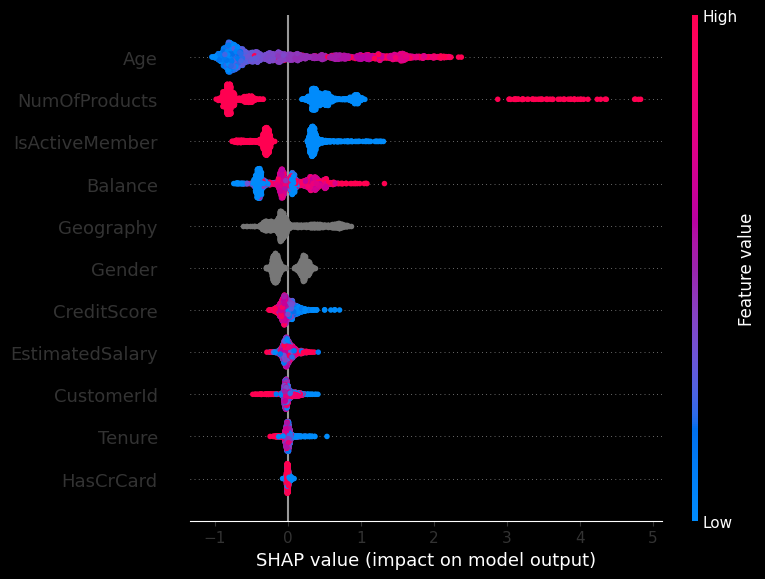

In [132]:
shap.summary_plot(shap_values, test[X])


In [133]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])


,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


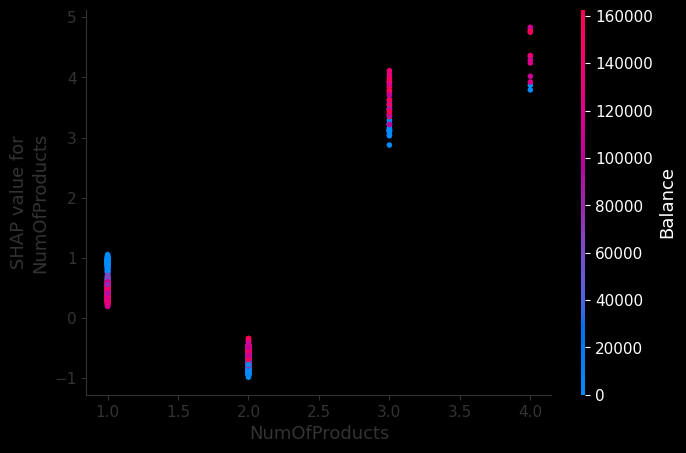

In [134]:
shap.dependence_plot("NumOfProducts", shap_values, test[X])


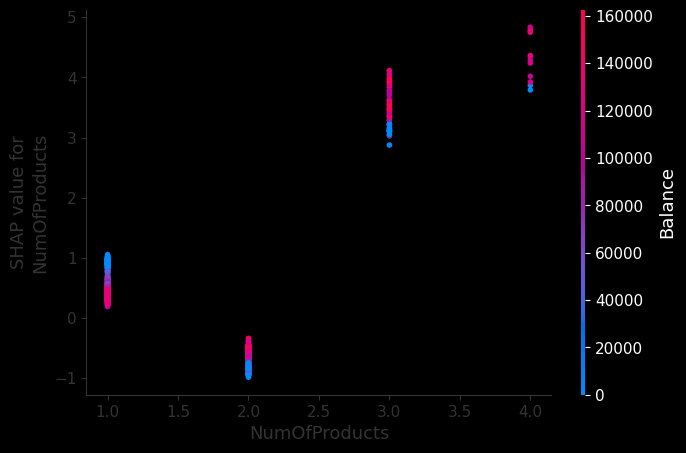

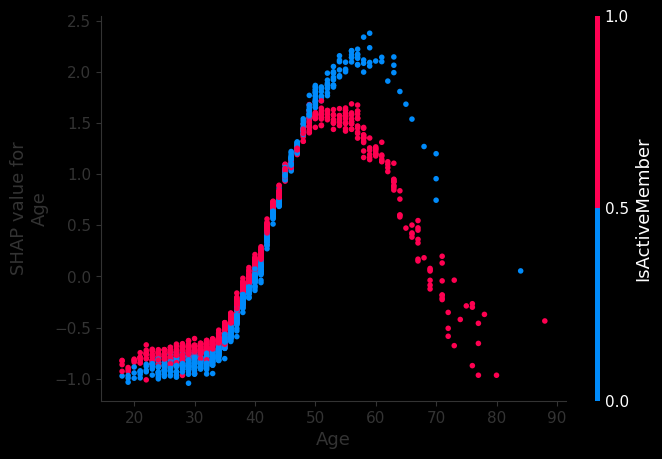

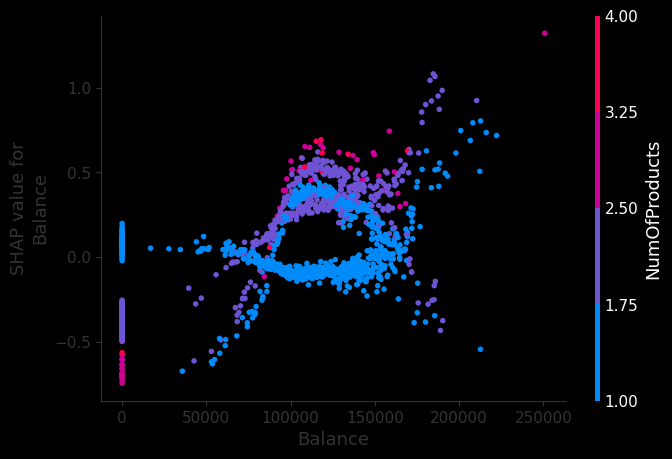

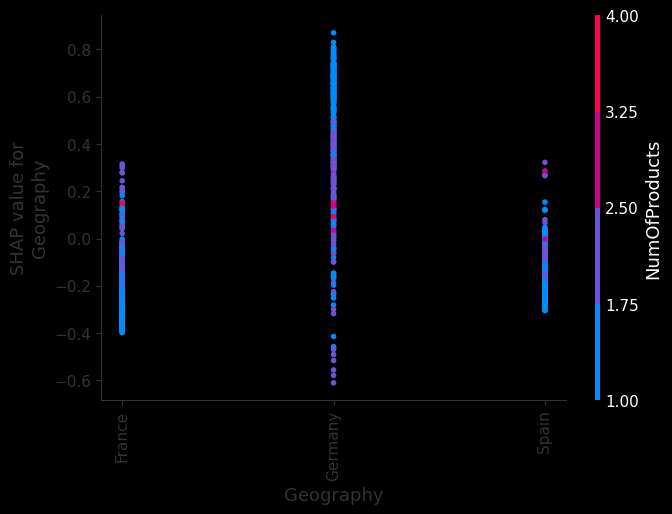

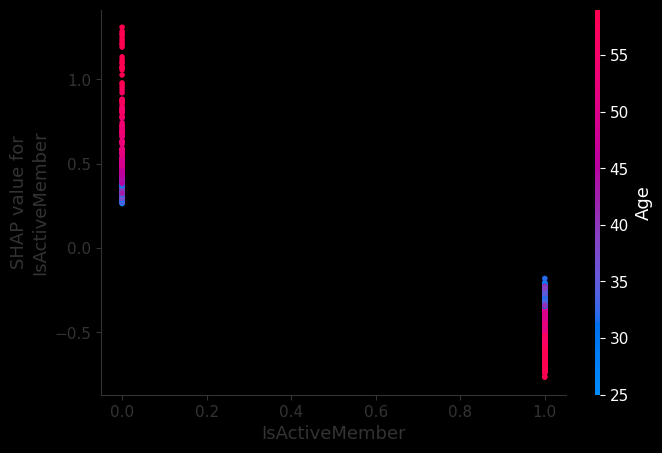

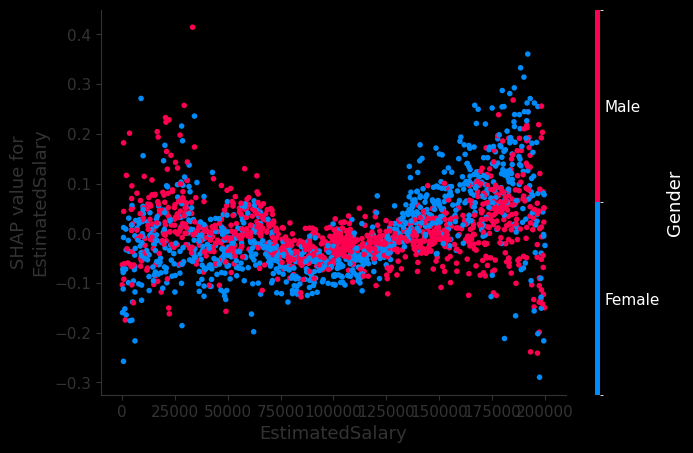

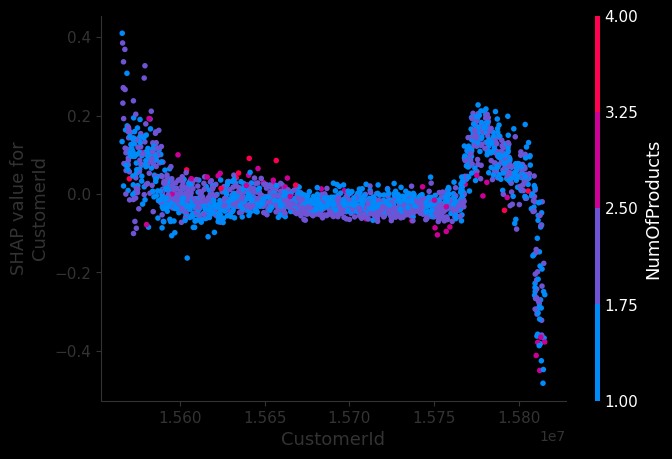

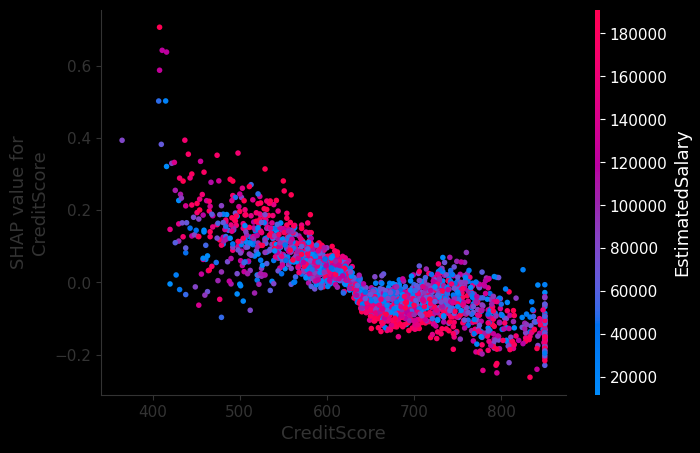

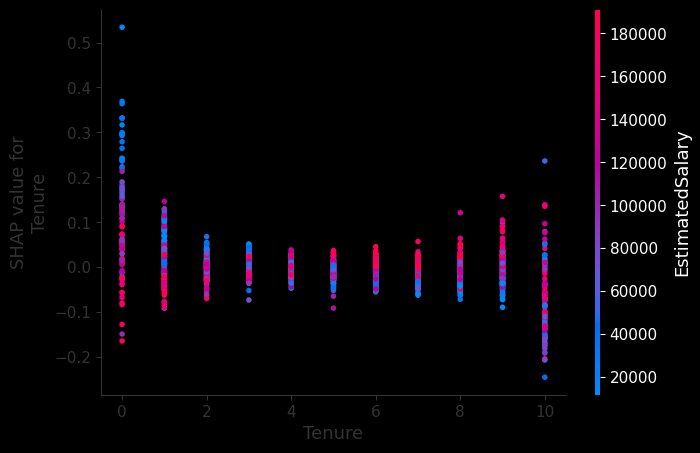

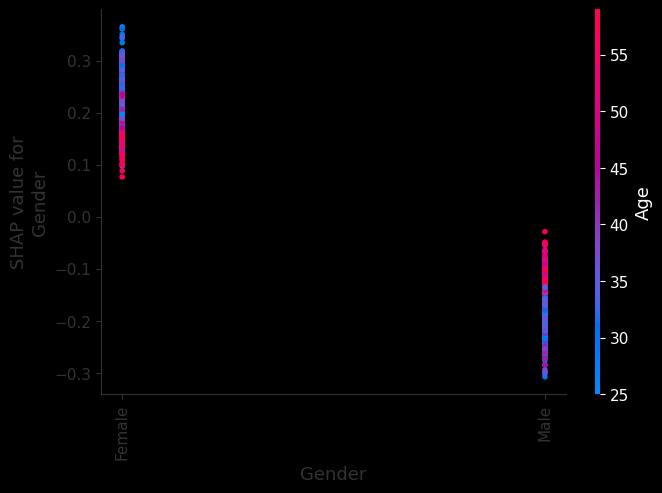

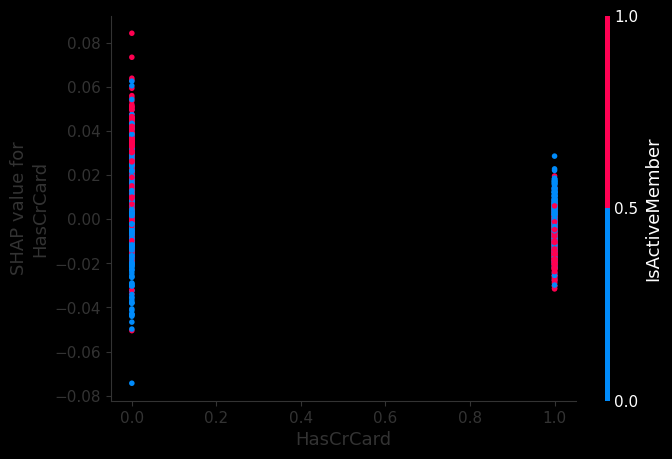

In [137]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

In [139]:
model.predict(test[X], prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

<Axes: >

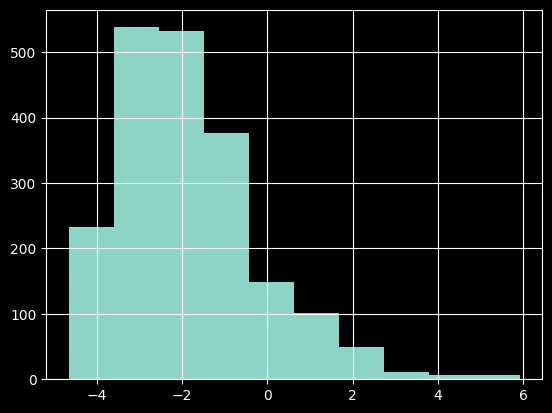

In [140]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).hist()


In [141]:

import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))
     

In [142]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).apply(sigmoid)


0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

In [143]:
model.predict_proba(test[X])


array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [144]:
model.predict(test[X],prediction_type='Probability')


array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])